# TFM - Walmart Sales Forecasting
***

## 1. Aquisición de datos

### 1.1 Recopilación de datos iniciales

Se dispone de tres conjuntos de datos principales:<br> 
 * **stores.csv** : contiene información anónima sobre las 45 tiendas, indicando el tipo y tamaño de la tienda.
 * **train.csv** :  contiene los datos históricos de entrenamiento, que abarcan desde 2010-02-05 hasta 2012-11-01.Dentro de este archivo se encuentran los siguientes campos:
   * Store: el número de tienda
   * Dept: el número de departamento
   * Date: la semana
   * Weekly_Sales: ventas para el departamento dado en la tienda dada
   * IsHoliday: indica si la semana es una semana especial de vacaciones
 * **features** : Este archivo contiene datos adicionales relacionados con la actividad de la tienda, el departamento y la región para las fechas dadas. Contiene los siguientes campos:
   * Store: el número de tienda
   * Date: la semana
   * Temperature: temperatura media en la región en grados Fahrenheit
   * Fuel_Price: coste del combustible en la región
   * MarkDown1-5: datos anónimos relacionados con las rebajas promocionales que Walmart está ejecutando. Los datos de MarkDown solo están disponibles después de noviembre de 2011 y no están disponibles para todas las tiendas todo el tiempo. Cualquier valor que falte se marca con un NA.
   * CPI: el índice de precios al consumidor
   * Unemployment: la tasa de desempleo
   * IsHoliday: indica si la semana es una semana especial de vacaciones

Los tres archivos están en formato .csv lo que permite la carga de dichos conjuntos de datos en formato pandas.DataFrame, generando un array bidimensional de tamaño mutable. La estructura resultante es una tabla de datos con dos ejes etiquetados (filas y columnas), donde las filas representan cada una de las instancias del conjunto de datos y las columnas representan cada una de las características o variables del mismo.

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_rows', 20)

In [6]:
df_store = pd.read_csv('walmart-recruiting-store-sales-forecasting/stores.csv')
df_store.head() 

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
df_train = pd.read_csv('walmart-recruiting-store-sales-forecasting/train.csv/train.csv')
df_train.head() 

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
df_features = pd.read_csv('walmart-recruiting-store-sales-forecasting/features.csv/features.csv')
df_features.head() 

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


### 1.2 Exploración de datos

In [6]:
print(df_store.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None


In [7]:
df_store.describe(include = "all")

,Store,Type,Size
count,45.000000,45,45.000000
unique,NaN,3,NaN
top,NaN,A,NaN
freq,NaN,22,NaN
mean,23.000000,NaN,130287.600000
std,13.133926,NaN,63825.271991
min,1.000000,NaN,34875.000000
25%,12.000000,NaN,70713.000000
50%,23.000000,NaN,126512.000000
75%,34.000000,NaN,202307.000000


In [8]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


In [9]:
df_train.describe(include = "all")

,Store,Dept,Date,Weekly_Sales,IsHoliday
count,421570.000000,421570.000000,421570,421570.000000,421570
unique,NaN,NaN,143,NaN,2
top,NaN,NaN,2011-12-23,NaN,False
freq,NaN,NaN,3027,NaN,391909
mean,22.200546,44.260317,NaN,15981.258123,NaN
std,12.785297,30.492054,NaN,22711.183519,NaN
min,1.000000,1.000000,NaN,-4988.940000,NaN
25%,11.000000,18.000000,NaN,2079.650000,NaN
50%,22.000000,37.000000,NaN,7612.030000,NaN
75%,33.000000,74.000000,NaN,20205.852500,NaN


In [10]:
print(df_features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


In [11]:
df_features.describe(include = "all")

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
count,8190.000000,8190,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190
unique,NaN,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,2010-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7605
mean,23.000000,NaN,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,NaN
std,12.987966,NaN,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,NaN
min,1.000000,NaN,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,NaN
25%,12.000000,NaN,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,NaN
50%,23.000000,NaN,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,NaN
75%,34.000000,NaN,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,NaN


#### 1.2.1 Observaciones
La tabla df_features contiene valores perdidos en todas las columnas de MarkDown y además en las columnas CPI y Unemployment. 
<br>Por otro lado, se observa que la tabla df_train tiene valores de Weekly_Sales negativos que desde el punto de vista lógico no tiene sentido real. Realizaremos una inspección sobre estos valores negativos de ventas y evaluaremos la posibilidad de eliminarlos después de fusionar las tres tablas.

### 1.3 Manipulación de datos

In [12]:
X = df_train.merge(df_features, on=['Store', 'Date', 'IsHoliday'], how='inner').merge(df_store, on=['Store'], how='inner')
X.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


#### 1.3.1 Ventas negativas

In [13]:
#Visualización de ventas negativas
print(f'Las filas con ventas negativas y sin ventas suponen el{len(X.loc[X["Weekly_Sales"]<=0])/len(X): .2%} de los casos, por lo que elimino las siguientes filas.' )
X.loc[X["Weekly_Sales"]<=0]

Las filas con ventas negativas y sin ventas suponen el 0.32% de los casos, por lo que elimino las siguientes filas.


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
188,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
406,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315
4132,1,47,2011-03-11,0.00,False,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,B,118221
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,B,118221
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221
421007,45,54,2012-08-31,0.00,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221


In [14]:
#Eliminación de ventas negativas
X= X.loc[X['Weekly_Sales']>0]

#### 1.3.2 Días festivos

Según las condiciones del problema, se debe considerar los siguientes días como festivo: 
 - Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
 - Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
 - Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
 - Christmas: 31-Dic-10, 30-Dic-11, 28-Dic-12, 27-Dic-13

In [15]:
import datetime as dt
X['Date'] = pd.to_datetime(X['Date'])

In [16]:
vacaciones = ["2010-02-12","2011-02-11","2012-02-10","2013-02-08","2010-09-10","2011-09-09","2012-09-07","2013-09-06","2010-11-26","2011-11-25","2012-11-23","2013-11-29","2010-12-31","2011-12-30","2012-12-28","2013-12-27"]

In [17]:
for dt in vacaciones:
    print (f'{dt} == {X.loc[X["Date"]==dt]["IsHoliday"].unique()}')
    

2010-02-12 == [ True]
2011-02-11 == [ True]
2012-02-10 == [ True]
2013-02-08 == []
2010-09-10 == [ True]
2011-09-09 == [ True]
2012-09-07 == [ True]
2013-09-06 == []
2010-11-26 == [ True]
2011-11-25 == [ True]
2012-11-23 == []
2013-11-29 == []
2010-12-31 == [ True]
2011-12-30 == [ True]
2012-12-28 == []
2013-12-27 == []


#### 1.3.3 Exploración sobre variables relacionadas con el precio de la vivienda

Puesto que el objetivo último de este proyecto es la predicción, y el número de variables es alto, la exploración ha de girar entorno a la variable de clase. A continuación se muestra la evolución del precio a traves de los años. En la gráfica se observa que exite dos picos a final de cada año.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns;

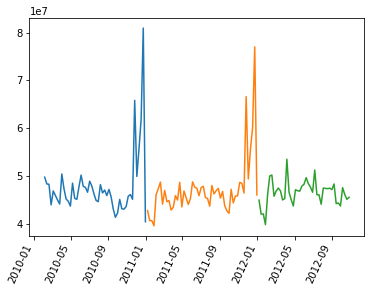

In [19]:
plt.plot(X.loc[X['Date'].dt.year==2010,['Date','Weekly_Sales']].groupby('Date').agg('sum'))
plt.plot(X.loc[X['Date'].dt.year==2011,['Date','Weekly_Sales']].groupby('Date').agg('sum'))
plt.plot(X.loc[X['Date'].dt.year==2012,['Date','Weekly_Sales']].groupby('Date').agg('sum'))
plt.xticks(rotation = 65, ha='right');

In [20]:
X.corr().style.background_gradient(cmap ='coolwarm')

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,1.000000,0.024258,-0.085117,-0.000522,-0.050230,0.065321,-0.119676,-0.034993,-0.031475,-0.009991,-0.026777,-0.211261,0.208759,-0.182763
Dept,0.024258,1.000000,0.148749,0.000663,0.004727,0.003544,-0.002512,0.000018,0.001855,0.004176,0.000295,-0.007178,0.007787,-0.002491
Weekly_Sales,-0.085117,0.148749,1.000000,0.012843,-0.002339,0.000089,0.085325,0.024565,0.060304,0.045325,0.090561,-0.021162,-0.025806,0.244117
IsHoliday,-0.000522,0.000663,0.012843,1.000000,-0.155775,-0.078155,-0.035632,0.334327,0.428364,-0.000459,-0.053696,-0.001933,0.010555,0.000797
Temperature,-0.050230,0.004727,-0.002339,-0.155775,1.000000,0.143700,-0.040498,-0.323891,-0.096843,-0.063955,-0.017616,0.182223,0.096768,-0.058413
Fuel_Price,0.065321,0.003544,0.000089,-0.078155,0.143700,1.000000,0.061302,-0.220680,-0.102146,-0.045033,-0.128017,-0.164199,-0.033915,0.003632
MarkDown1,-0.119676,-0.002512,0.085325,-0.035632,-0.040498,0.061302,1.000000,0.024601,-0.108189,0.819175,0.160412,-0.055522,0.050103,0.345732
MarkDown2,-0.034993,0.000018,0.024565,0.334327,-0.323891,-0.220680,0.024601,1.000000,-0.050146,-0.007582,-0.007410,-0.039782,0.020839,0.108843
MarkDown3,-0.031475,0.001855,0.060304,0.428364,-0.096843,-0.102146,-0.108189,-0.050146,1.000000,-0.071148,-0.026475,-0.023820,0.012866,0.048935
MarkDown4,-0.009991,0.004176,0.045325,-0.000459,-0.063955,-0.045033,0.819175,-0.007582,-0.071148,1.000000,0.107895,-0.049693,0.024919,0.168266


Vemos que existe una correlación positiva entre las variables Markdown1 y Markdown4 que no se puede interpretar ya que no existe información sobre el significado de estas variables. Por otro lado y prestando atención en la variable a predecir (Weekly_Sales) se observa que sí existe una muy poca correlación positiva con el tamaño de la tienda lo que sí parece coherente con la realidad, y en menor medida con el departamento (Dept).

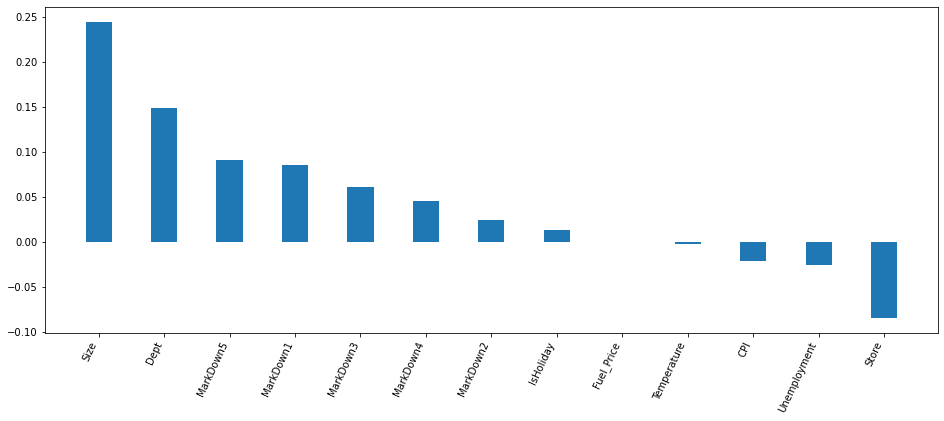

In [21]:
corr_wk_sales = X.corr()[['Weekly_Sales']].sort_values (by = 'Weekly_Sales', ascending = False).iloc[1:]
plt.figure(figsize=(16,6))
plt.bar(corr_wk_sales.index,corr_wk_sales.values.flatten(), width = 0.4 )
plt.xticks(rotation = 65, ha='right')
plt.show()

<AxesSubplot:xlabel='Type', ylabel='Size'>

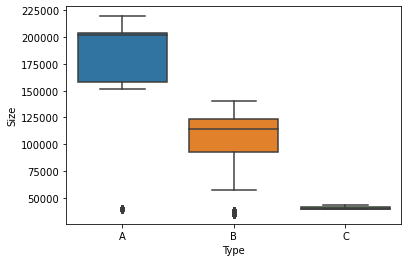

In [22]:
sns.boxplot(data=X, x='Type', y='Size')

El gráfico muestra que las tiendas tipo A tienen mayor tamaño. Ahora veremos la correlación con las ventas. 

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

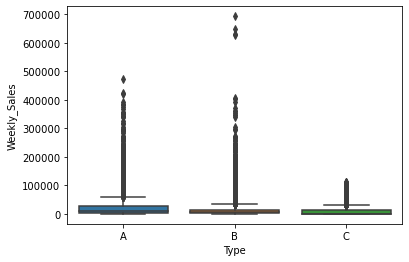

In [23]:
sns.boxplot(data=X[['Type','Weekly_Sales']], x='Type', y='Weekly_Sales')

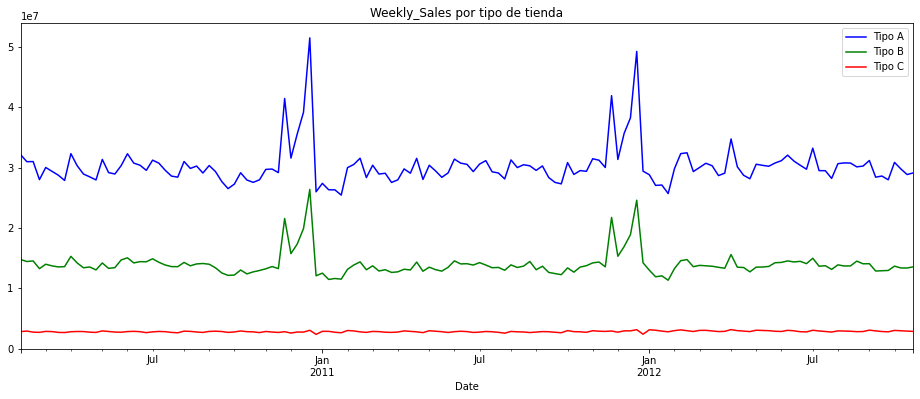

In [24]:
plt.figure(figsize=(16,6))
ax = plt.gca()

X.loc[X['Type']=='A',['Date','Type','Weekly_Sales']].groupby('Date').agg('sum').reset_index().plot(x='Date',y='Weekly_Sales',color = 'blue',label='Tipo A', ax = ax)
X.loc[X['Type']=='B',['Date','Type','Weekly_Sales']].groupby('Date').agg('sum').reset_index().plot(x='Date',y='Weekly_Sales',color = 'green',label='Tipo B',ax = ax)
X.loc[X['Type']=='C',['Date','Type','Weekly_Sales']].groupby('Date').agg('sum').reset_index().plot(x='Date',y='Weekly_Sales',color = 'red',label='Tipo C',ax = ax)
plt.title('Weekly_Sales por tipo de tienda')
plt.show()

In [25]:
X['week_num'] = X['Date'].dt.isocalendar().week
X.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week_num
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5


#### 1.3.4 Precio de la gasolina

Esta columna se puede agrupar en lotes 

Text(0.5, 1.0, 'Fuel_Price')

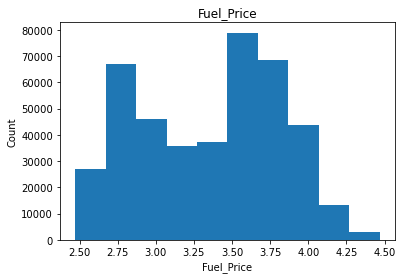

In [26]:
plt.hist(X["Fuel_Price"])

plt.xlabel("Fuel_Price")
plt.ylabel("Count")
plt.title("Fuel_Price")

In [27]:
bins = [min(X["Fuel_Price"]), 2.6, 3.5, 3.9, max(X["Fuel_Price"])]
bins

[2.472, 2.6, 3.5, 3.9, 4.468]

In [28]:
group_names = ['Low', 'Medium', 'Medium-High', 'High']
X["Fuel_Price-group"] = pd.cut(X["Fuel_Price"], bins, labels=group_names, include_lowest=True )
X[["Fuel_Price","Fuel_Price-group"]].head(5)

,Fuel_Price,Fuel_Price-group
0,2.572,Low
1,2.572,Low
2,2.572,Low
3,2.572,Low
4,2.572,Low


Text(0.5, 1.0, 'Fuel_Price')

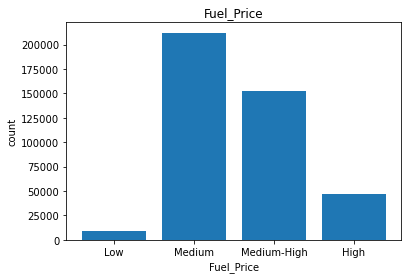

In [29]:
plt.bar( group_names, X["Fuel_Price-group"].value_counts(sort=False))

# set x/y labels and plot title
plt.xlabel("Fuel_Price")
plt.ylabel("count")
plt.title("Fuel_Price")

### 1.4 Entrenamiento

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error


# DataFrame con los resultados
results = pd.DataFrame(columns=['Modelo','$R^2$ Entrenamiento','$R^2$ Validación','$R^2$ Test', 
                                         'MAE Entrenamiento', 'MAE Test']).set_index('Modelo')
results

def show_results(description, model, X_train, y_train, X_test, y_test, is_log=False):
    train_r2 = model.score(X_train,y_train)
    val_r2 = cross_val_score(model,X_train,y_train,cv=5).mean()
    test_r2 = model.score(X_test, y_test)
    
    # Si se utiliza el logaritmo de la variable objetivo hay que 
    # convertirlo para calcular el error
    f = np.exp if is_log else lambda y: y
    # Calcula el error    
    train_mae = mean_absolute_error(f(y_train), f(model.predict(X_train)))
    test_mae = mean_absolute_error(f(y_test), f(model.predict(X_test)))
    
    # Muetra los resultados en formato legible
    print('Training \t\txValidation \t\tTest')
    print('-------- \t\t----------- \t\t----')
    print(f"R\u00B2 = {train_r2:.3f}\t\tR\u00B2 = {val_r2:.3f}\t\tR\u00B2 = {test_r2:.3f}")
    print(f"MAE = {train_mae:.2f}\t\t\t\t\tMAE = {test_mae:.2f}")
    
    results.loc[description]= (train_r2, val_r2, test_r2, train_mae, test_mae)

In [31]:
from sklearn.model_selection import train_test_split

dfX = X.drop(columns=['Weekly_Sales','Date','Fuel_Price']).copy()
dfy = X['Weekly_Sales'].copy()

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.33, random_state=0)

print(X_train.shape)
print(X_test.shape)

(281542, 15)
(138670, 15)


Rellenamos los valores vacíos de las columnas MarkDown con 0 ya que se supone que se dejaron vacíos si no hubo rebaja.

In [32]:
num_features = X_train.select_dtypes(include=np.number).columns.to_list()
cat_features = X_train.select_dtypes(exclude=np.number).columns.to_list()

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant')),
    ('scaler', StandardScaler())
    ])
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
pipe_transf = ColumnTransformer(
    transformers = [
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
        ])

#### 1.4.1 Ensemble Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rforest_model = RandomForestRegressor();

pipe_transf_rforest = Pipeline([
    ('prep', pipe_transf),
    ('clas', rforest_model)
    ])

parameters = {}
parameters['clas__n_estimators'] = [2,10,50, 100]
parameters['clas__max_depth'] = [5,10,15]

search = GridSearchCV(pipe_transf_rforest, param_grid = parameters , cv=3)
search.fit(X_train,y_train)
print(search.best_params_, end='\n\n')

In [ ]:
rforest = search.best_estimator_
description = 'Random forest'
show_results(description, rforest, X_train, y_train, X_test, y_test)

#### 1.4.2 Series temporales : Prophet

In [35]:
from prophet import Prophet
from prophet.plot import plot_plotly

In [36]:
X.Date.dt.isocalendar().week

0          5
1          5
2          5
3          5
4          5
          ..
421565    43
421566    43
421567    43
421568    43
421569    43
Name: week, Length: 420212, dtype: UInt32

In [37]:
X["month"] = X.Date.dt.month
X["week"] = X.Date.dt.isocalendar().week
X["day"] = X.Date.dt.day
X["day_of_week"] = X.Date.dt.dayofweek
X.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,Type,Size,week_num,Fuel_Price-group,month,week,day,day_of_week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,211.096358,8.106,A,151315,5,Low,2,5,5,4
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,211.096358,8.106,A,151315,5,Low,2,5,5,4
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,211.096358,8.106,A,151315,5,Low,2,5,5,4
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,211.096358,8.106,A,151315,5,Low,2,5,5,4
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,211.096358,8.106,A,151315,5,Low,2,5,5,4


In [38]:
holiday_week = X[X['IsHoliday'] == 1]
holiday_week = holiday_week.groupby('Date')['Weekly_Sales'].agg(sales=sum).reset_index()
holiday_week

,Date,sales
0,2010-02-12,48336800.10
1,2010-09-10,45635418.66
2,2010-11-26,65821216.26
3,2010-12-31,40434740.42
4,2011-02-11,47336816.90
5,2011-09-09,46763760.42
6,2011-11-25,66593835.85
7,2011-12-30,46044300.91
8,2012-02-10,50010196.60
9,2012-09-07,48330449.03


In [39]:
no_holiday_week = X[X['IsHoliday'] == 0]
no_holiday_week = no_holiday_week.groupby('Date')['Weekly_Sales'].agg(sales=sum).reset_index()
no_holiday_week

,Date,sales
0,2010-02-05,49750875.98
1,2010-02-19,48277902.33
2,2010-02-26,43970440.65
3,2010-03-05,46872715.16
4,2010-03-12,45926841.32
...,...,...
128,2012-09-28,43735713.56
129,2012-10-05,47567053.49
130,2012-10-12,46128909.98
131,2012-10-19,45122443.96


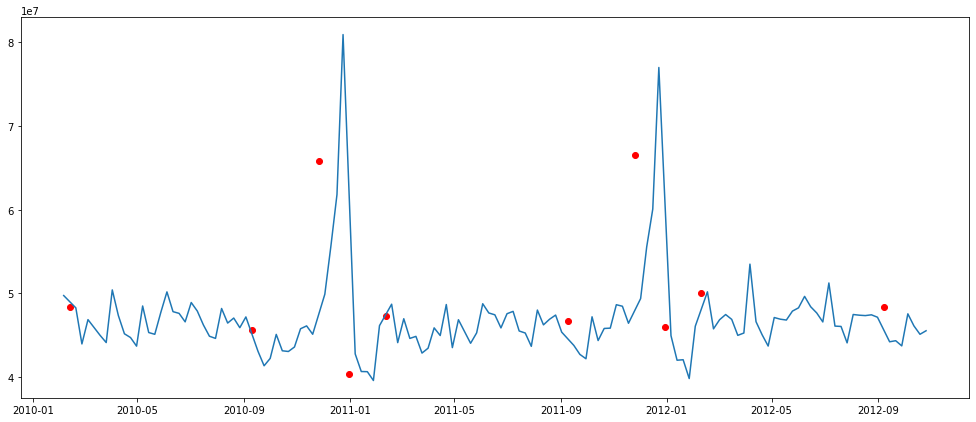

In [40]:
plt.figure(figsize=(17,7))
plt.scatter(holiday_week['Date'],holiday_week['sales'],c='red');
plt.plot(no_holiday_week['Date'],no_holiday_week['sales']);

#### Modelando Vacaciones y eventos especiales.

In [41]:
labor_day = pd.DataFrame({
    'holiday':'labor day',
    'ds':pd.to_datetime(['2010-09-10','2011-09-09','2012-09-07','2013-09-06']),
    'lower_window': 0,
    'upper_window': 0
})
thanksgiving = pd.DataFrame({
    'holiday':'thanksgiving',
    'ds':pd.to_datetime(['2010-11-26','2011-11-25','2012-11-23','2013-11-29']),
    'lower_window': 0,
    'upper_window': 1
})
christmas = pd.DataFrame({
    'holiday':'christmas',
    'ds':pd.to_datetime(['2010-12-31','2011-12-30','2012-12-28','2013-12-27']),
    'lower_window': -1,
    'upper_window': 0
})
superbowl = pd.DataFrame({
    'holiday':'superbowl',
    'ds':pd.to_datetime(['2010-02-12','2011-02-11','2012-02-10','2013-02-08']),
    'lower_window': 0,
    'upper_window': 1
})
holidays = pd.concat([labor_day,thanksgiving,christmas,superbowl])

In [42]:
X=X.rename(columns = {'Date':'ds','Weekly_Sales':'y'}).copy()

In [52]:
X= X.drop(columns=[ 'IsHoliday','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Fuel_Price-group','week_num','month','day','day_of_week','week']).copy()

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.iloc[:,8] = le.fit_transform(X.iloc[:,8])
X.tail(2)

,Store,Dept,ds,y,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
421568,45,97,2012-10-26,6817.48,58.85,3.882,192.308899,8.667,1,118221
421569,45,98,2012-10-26,1076.80,58.85,3.882,192.308899,8.667,1,118221


In [55]:
cut = pd.to_datetime('2012-02-28')
X_train = X[X['ds'] < cut]
X_test = X[X['ds']>= cut]

In [46]:
import itertools
from prophet.diagnostics import cross_validation

In [56]:
regresores = [c for c in X_train.columns if c not in ['ds', 'y'] ]
regresores

['Store',
 'Dept',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'Type',
 'Size']

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316927 entries, 0 to 419208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         316927 non-null  int64         
 1   Dept          316927 non-null  int64         
 2   ds            316927 non-null  datetime64[ns]
 3   y             316927 non-null  float64       
 4   Temperature   316927 non-null  float64       
 5   Fuel_Price    316927 non-null  float64       
 6   CPI           316927 non-null  float64       
 7   Unemployment  316927 non-null  float64       
 8   Type          316927 non-null  int64         
 9   Size          316927 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 26.6 MB


In [ ]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale':[0.1, 1, 10.0],
    'growth': ['linear', 'logistic']
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(holidays=holidays, **params)
    
    for r in regresores:
        m.add_regressor(r, mode='additive')
        
    m.add_seasonality(name='monthly', period=30.5, fourier_order=5) 
    m.fit(X_train)
    df_cv = cross_validation(m, initial='366 days', period='30 days', horizon = '365 days', parallel="processes")
    df_p = performance_metrics(df_cv)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\ulise\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\ulise\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Making 1 forecasts with cutoffs between 2011-02-24 00:00:00 and 2011-02-24 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001DF8786D490>


### Red Neuronal - MLPRegressor

In [136]:
dfX=X[X.columns[2:-1]]

In [137]:
dfX.head()

,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week_num
0,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
1,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
2,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
3,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
4,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5


In [138]:
dfX = dfX.groupby(by = 'Date').agg({
    'Weekly_Sales':sum,
    'IsHoliday': max,
    'Temperature': max,
    'Fuel_Price': max,
    'MarkDown1': max,
    'MarkDown2': max,
    'MarkDown3': max,
    'MarkDown4': max,
    'MarkDown5': max,
    'CPI': max, 
    'Unemployment': 'mean' ,
    'week_num': max
    }).reset_index()

In [34]:
from sklearn.neural_network import MLPRegressor
from sklearn.compose import make_column_selector

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing

#### Procesamiento

In [35]:
num_features_mlp = dfX.select_dtypes(include=np.number).columns.to_list()
cat_features_mlp = dfX.select_dtypes(exclude=np.number).columns.to_list()

In [134]:
dfX 

,week_num,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,8.773208e+07,False,60.92,3.599,11181.59,45971.43,839.74,3743.55,15911.56,223.433241,7.865476
1,2,8.269736e+07,False,56.28,3.666,8081.05,23438.57,636.54,2289.80,10488.23,223.616805,7.862491
2,3,8.273693e+07,False,59.46,3.705,6552.26,9280.81,860.90,2567.91,7147.30,223.711429,7.856417
3,4,7.943549e+07,False,62.73,3.737,6065.01,4172.39,689.52,901.08,24241.12,223.806053,7.858760
4,5,1.419903e+08,False,61.33,3.796,88646.76,8766.77,788.56,67474.85,24354.20,223.900677,8.100872
...,...,...,...,...,...,...,...,...,...,...,...,...
47,48,9.930125e+07,False,59.12,3.701,10739.64,305.47,25959.98,6615.50,36360.42,222.397544,8.100194
48,49,1.112294e+08,False,60.72,3.644,11472.59,193.94,1800.87,6168.78,37581.27,222.656120,8.098449
49,50,1.219080e+08,False,61.12,3.611,7510.92,556.15,10748.31,1766.33,14608.23,222.882548,8.096517
50,51,1.579314e+08,False,60.43,3.587,3124.45,632.93,2971.53,1375.84,17699.26,223.066113,8.098232


In [36]:
mlpreg_model = MLPRegressor(solver = 'lbfgs', max_iter= 1000)

pipe_transf_mlpreg = Pipeline([
    ('prep', pipe_transf),
    ('clas', mlpreg_model)
    ])

In [54]:
print(y_test.shape)
print( y_train.shape)

(285745,)
(134467,)


In [37]:
parameters_mlpreg = {}
parameters_mlpreg['clas__hidden_layer_sizes'] = [(10), (20), (10, 10)]
parameters_mlpreg['clas__alpha'] = np.logspace(-3, 3, 10)
parameters_mlpreg['clas__learning_rate_init'] = [0.001, 0.01]

grid = RandomizedSearchCV(
        estimator  = pipe_transf_mlpreg,
        param_distributions = parameters_mlpreg,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        cv         = 3, 
        verbose    = 0,
        random_state = 0,
        return_train_score = True
       )

In [ ]:
grid.fit(X = X_train, y = y_train)

C:\Users\ulise\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ulise\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ulise\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE